In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams.update({'font.size': 18})

In [2]:
data = pd.read_csv('imgs/log.csv')
try:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [float(si) for si in s.split(":")])
except:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [0])
data.head()

,Generation,BestEval,FlatWeights
0,0,0.111623,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,0.111623,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,100,0.368783,"[0.0, 0.0016, 0.0, 0.0, -0.0076, 0.0, 0.0, 0.0..."
3,200,0.628382,"[0.0, 0.0016, -0.0053, 0.0, -0.0076, 0.0059, 0..."
4,300,0.864483,"[0.0, 0.0083, -0.0172, 0.0, -0.0076, 0.0059, 0..."


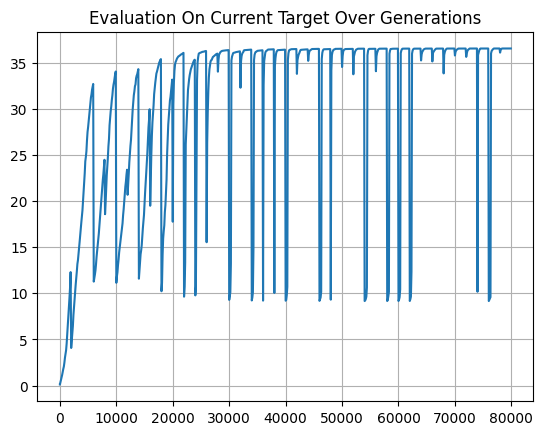

In [3]:
plt.plot(data["Generation"], data["BestEval"])
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.show()

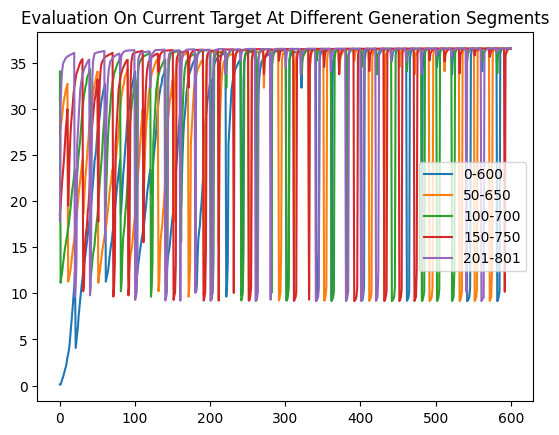

In [4]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.title("Evaluation On Current Target At Different Generation Segments")
plt.show()

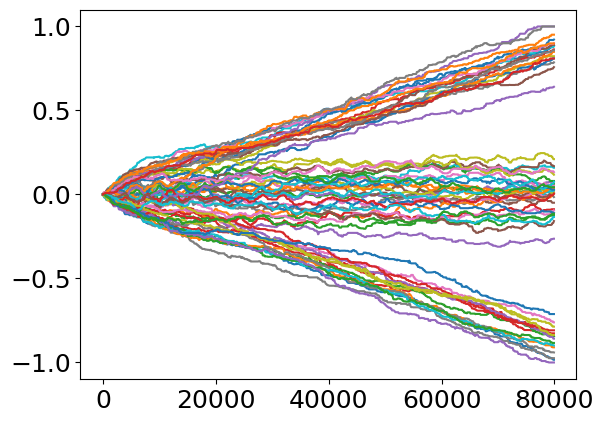

In [24]:
weights_seqs = [[] for _ in range(len(data["FlatWeights"][0]))]
for weights in data["FlatWeights"]:
    for i, w in enumerate(weights):
        weights_seqs[i].append(w)

for ws in weights_seqs:
    plt.plot(data["Generation"], ws)
plt.show()

In [6]:
ddf = pd.read_csv("imgs/d.csv")
ddf["Vals"] = ddf["Vals"].apply(lambda s: [float(si) for si in s.split(":")])
ddf.head()

,Id,Timestep,Vals
0,0,0,"[-0.539156, -0.692148, -0.763673, 0.687051, 0...."
1,0,1,"[-1.132053, 0.286746, -1.340454, 1.178598, -0...."
2,0,2,"[-1.892522, 1.228858, -2.071775, 1.920236, -1...."
3,0,3,"[-2.513838, 1.983085, -2.65742, 2.535749, -2.1..."
4,0,4,"[-3.011065, 2.586468, -3.125936, 3.028582, -2...."


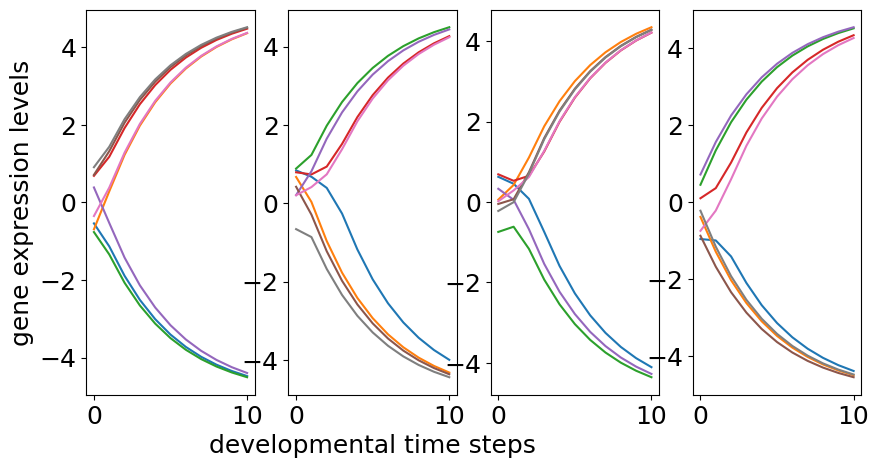

In [28]:
uids = list(ddf["Id"].unique())
fig, axs = plt.subplots(1, len(uids), figsize=(10, 5))
idi = 0
for id in uids:
    ddf_id = ddf[ddf["Id"] == id]
    num_vals = len(list(ddf_id["Vals"])[0])
    vals_seqs = [[] for _ in range(num_vals)]
    for vals in ddf_id["Vals"]:
        for i, v in enumerate(vals):
            vals_seqs[i].append(v)
    for vs in vals_seqs:
        axs[idi].plot(ddf_id["Timestep"], vs)
    idi+=1

axs[0].set_ylabel("gene expression levels")
axs[1].set_xlabel("developmental time steps")
plt.show()

evolved


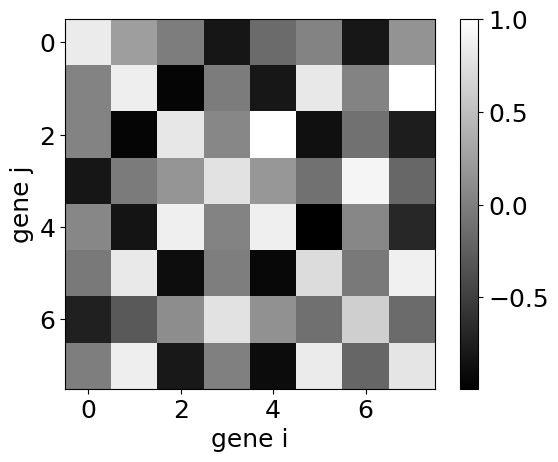

hebbian


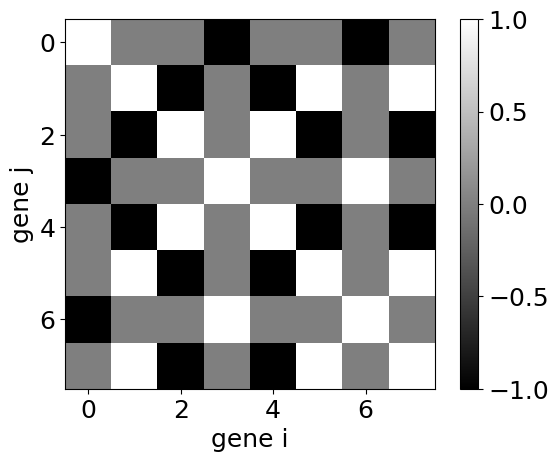

In [23]:
img_ev = np.array(Image.open("imgs/evo_weights_max1.png"))/255.0*2-1
img_hebb = np.array(Image.open("imgs/hebb_weights_max1.png"))/255.0*2-1

print("evolved")
plt.imshow(img_ev, cmap="gray")
plt.xlabel("gene i")
plt.ylabel("gene j")
plt.colorbar()
plt.show()
print("hebbian")
plt.imshow(img_hebb, cmap="gray")
plt.xlabel("gene i")
plt.ylabel("gene j")
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


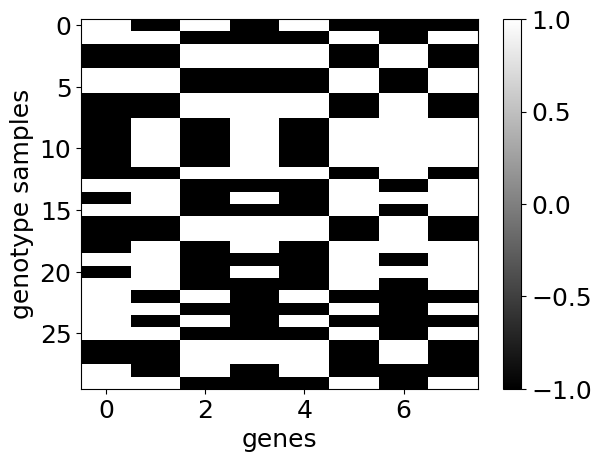

In [32]:
try:
    img_fig12e = np.array(Image.open("imgs/evo_fig12e.png"))/255.0*2-1
    plt.imshow(img_fig12e, cmap="gray", vmin=-1, vmax=1, aspect="auto")
    plt.colorbar()
    plt.xlabel("genes")
    plt.ylabel("genotype samples")
    plt.show()
except:
    print("No fig12e")

In [10]:
try:
    int_diag = np.array(Image.open("imgs/evo_intermediate.png"))/255.0
    plt.imshow(int_diag, cmap="gray")
    plt.axis("off")
    plt.show()
except:
    print("No inter diagram")

No inter diagram


In [11]:
data_bitdense = pd.read_csv('imgs/log.csv')
data_dense = pd.read_csv('imgs/log_dense.csv')

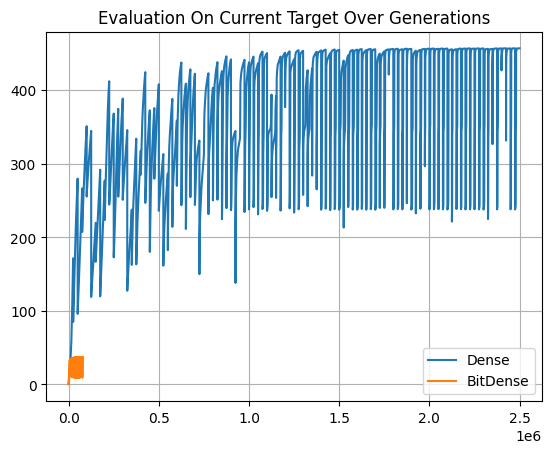

In [12]:
plt.plot(data_dense["Generation"], data_dense["BestEval"], label="Dense")
plt.plot(data_bitdense["Generation"], data_bitdense["BestEval"], label="BitDense")
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.legend()
plt.show()

In [13]:
# now do a lot of smoothing on that data and show it again
data_bitdense["BestEvalSmoothed"] = data_bitdense["BestEval"].rolling(window=1000).mean()
data_dense["BestEvalSmoothed"] = data_dense["BestEval"].rolling(window=1000).mean()

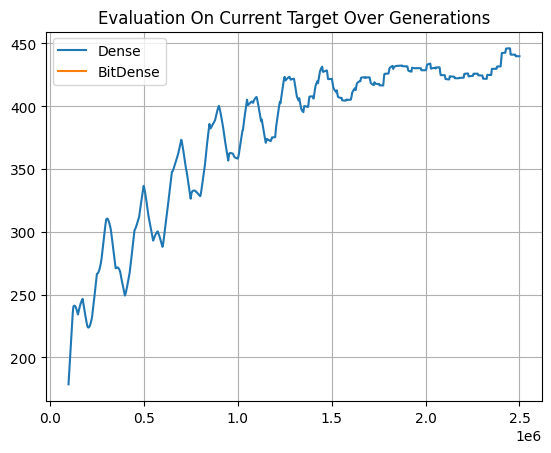

In [14]:
plt.plot(data_dense["Generation"], data_dense["BestEvalSmoothed"], label="Dense")
plt.plot(data_bitdense["Generation"], data_bitdense["BestEvalSmoothed"], label="BitDense")
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.legend()
plt.show()